假设有一名植物学爱好者对她发现的鸢尾花的品种很感兴趣。她收集了每朵鸢尾花的一些测量数据：花瓣的长度和宽度以及花萼的长度和宽度，所有测量结果的单位都是厘米（见图 1-1）。
<img src='imgs\1-1.png' width=40%></img>
<center><bold>图1-1: 鸢尾花局部</bold></center>

她还有一些鸢尾花的测量数据，这些花之前已经被植物学专家鉴定为属于 setosa、versicolor 或 virginica 三个品种之一。对于这些测量数据，她可以确定每朵鸢尾花所属的品种。我们假设这位植物学爱好者在野外只会遇到这三种鸢尾花。

我们的目标是构建一个机器学习模型，可以从这些已知品种的鸢尾花测量数据中进行学习，从而能够预测新鸢尾花的品种。

因为我们有已知品种的鸢尾花的测量数据，所以这是一个监督学习问题。在这个问题中，我们要在多个选项中预测其中一个（鸢尾花的品种）。这是一个分类（classification）问题的示例。可能的输出（鸢尾花的不同品种）叫作类别（class）。数据集中的每朵鸢尾花都属于三个类别之一，所以这是一个三分类问题

单个数据点（一朵鸢尾花）的预期输出是这朵花的品种。对于一个数据点来说，它的品种叫作标签（label）。

## 1. 1 初识数据

先加载必要的python库

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn  # 仓库已付，主要用来美化图像
%matplotlib inline    

本例中我们用到了鸢尾花（Iris）数据集，这是机器学习和统计学中一个经典的数据集。它包含在 scikit-learn 的 datasets 模块中。我们可以调用 load_iris 函数来加载数据：

In [4]:
from sklearn.datasets import load_iris
iris_dataset =load_iris()

load_iris 返回的 iris 对象是一个 Bunch 对象，与字典非常相似，里面包含键和值，可以输出查看一些里面的键：

In [5]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['filename', 'feature_names', 'target', 'target_names', 'DESCR', 'data'])


DESCR 键对应的值是数据集的简要说明。我们这里给出说明的开头部分（你可以自己查看其余的内容）：

In [6]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


target_names 键对应的值是一个字符串数组，里面包含我们要预测的花的品种：

In [7]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


feature_names 键对应的值是一个字符串列表，对每一个特征进行了说明：

In [8]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


数据包含在 target 和 data 字段中。 data 里面是花萼长度、花萼宽度、花瓣长度、花瓣宽度的测量数据，格式为 NumPy 数组：

In [9]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


data 数组的每一行对应一朵花，列代表每朵花的四个测量数据：

In [10]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


可以看出，数组中包含 150 朵不同的花的测量数据。前面说过，机器学习中的个体叫作样本（sample），其属性叫作特征（feature）。 data 数组的形状（shape）是样本数乘以特征数。这是 scikit-learn 中的约定，你的数据形状应始终遵循这个约定。下面给出前 5 个样本的特征数值：

In [11]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


从数据中可以看出，前 5 朵花的花瓣宽度都是 0.2cm，第一朵花的花萼最长，是 5.1cm。target 数组包含的是测量过的每朵花的品种，也是一个 NumPy 数组：

In [12]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


target 是一维数组，每朵花对应其中一个数据：

In [13]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


品种被转换成从 0 到 2 的整数：

In [14]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


上述数字的代表含义由 iris['target_names'] 数组给出：0 代表 setosa，1 代表 versicolor，
2 代表 virginica。

## 1.2 训练和测试数据

我们想要利用这些数据构建一个机器学习模型，用于预测新测量的鸢尾花的品种。但在将模型应用于新的测量数据之前，我们需要知道模型是否有效，也就是说，我们是否应该相信它的预测结果。

不幸的是，我们不能将用于构建模型的数据用于评估模型。因为我们的模型会一直记住整个训练集，所以对于训练集中的任何数据点总会预测正确的标签。这种“记忆”无法告诉我们模型的泛化（generalize）能力如何（换句话说，在新数据上能否正确预测）。

我们要用新数据来评估模型的性能。新数据是指模型之前没有见过的数据，而我们有这些新数据的标签。通常的做法是将收集好的带标签数据（此例中是 150 朵花的测量数据）分成两部分。一部分数据用于构建机器学习模型，叫作训练数据（training data）或训练集（training set）。其余的数据用来评估模型性能，叫作测试数据（test data）、测试集（test set）或留出集（hold-out set）。

scikit-learn 中的 train_test_split 函数可以打乱数据集并进行拆分。这个函数将 75% 的行数据及对应标签作为训练集，剩下 25% 的数据及其标签作为测试集。训练集与测试集的分配比例可以是随意的，但使用 25% 的数据作为测试集是很好的经验法则。

scikit-learn 中的数据通常用大写的 X 表示，而标签用小写的 y 表示。这是受到了数学标准公式 f(x)=y 的启发，其中 x 是函数的输入，y 是输出。我们用大写的 X 是因为数据是一个二维数组（矩阵），用小写的 y 是因为目标是一个一维数组（向量），这也是数学中
的约定。

对数据调用 train_test_split ，并对输出结果采用下面这种命名方法：

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

在对数据进行拆分之前， train_test_split 函数利用伪随机数生成器将数据集打乱。如果我们只是将最后 25% 的数据作为测试集，那么所有数据点的标签都是 2 ，因为数据点是按标签排序的（参见之前 iris['target'] 的输出）。测试集中只有三个类别之一，这无法告诉我们模型的泛化能力如何，所以我们将数据打乱，确保测试集中包含所有类别的数据。

为了确保多次运行同一函数能够得到相同的输出，我们利用 random_state 参数指定了随机数生成器的种子。这样函数输出就是固定不变的，所以这行代码的输出始终相同。本书用到随机过程时，都会用这种方法指定 random_state 。

train_test_split 函数的输出为 X_train 、 X_test 、 y_train 和 y_test ，它们都是 NumPy数组。 X_train 包含 75% 的行数据， X_test 包含剩下的 25%：

In [16]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [17]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


## 1.3 观察数据

在构建机器学习模型之前，通常最好检查一下数据，看看如果不用机器学习能不能轻松完成任务，或者需要的信息有没有包含在数据中。此外，检查数据也是发现异常值和特殊值的好方法。举个例子，可能有些鸢尾花的测量单位是英寸而不是厘米。在现实世界中，经常会遇到不一致的数据和意料之外的测量数据。

检查数据的最佳方法之一就是将其可视化。一种可视化方法是绘制散点图（scatter plot）。数据散点图将一个特征作为 x 轴，另一个特征作为 y 轴，将每一个数据点绘制为图上的一个点。不幸的是，计算机屏幕只有两个维度，所以我们一次只能绘制两个特征（也可能是3 个）。用这种方法难以对多于 3 个特征的数据集作图。解决这个问题的一种方法是绘制散点图矩阵（pair plot），从而可以两两查看所有的特征。如果特征数不多的话，比如我们这里有 4 个，这种方法是很合理的。但是你应该记住，散点图矩阵无法同时显示所有特征之间的关系，所以这种可视化方法可能无法展示数据的某些有趣内容。

下面的代码输出训练集中特征的散点图矩阵。数据点的颜色与鸢尾花的品种相对应。为了绘制这张图，我们首先将 NumPy 数组转换成 pandas DataFrame 。 pandas 有一个绘制散点图矩阵的函数，叫作 scatter_matrix 。矩阵的对角线是每个特征的直方图：

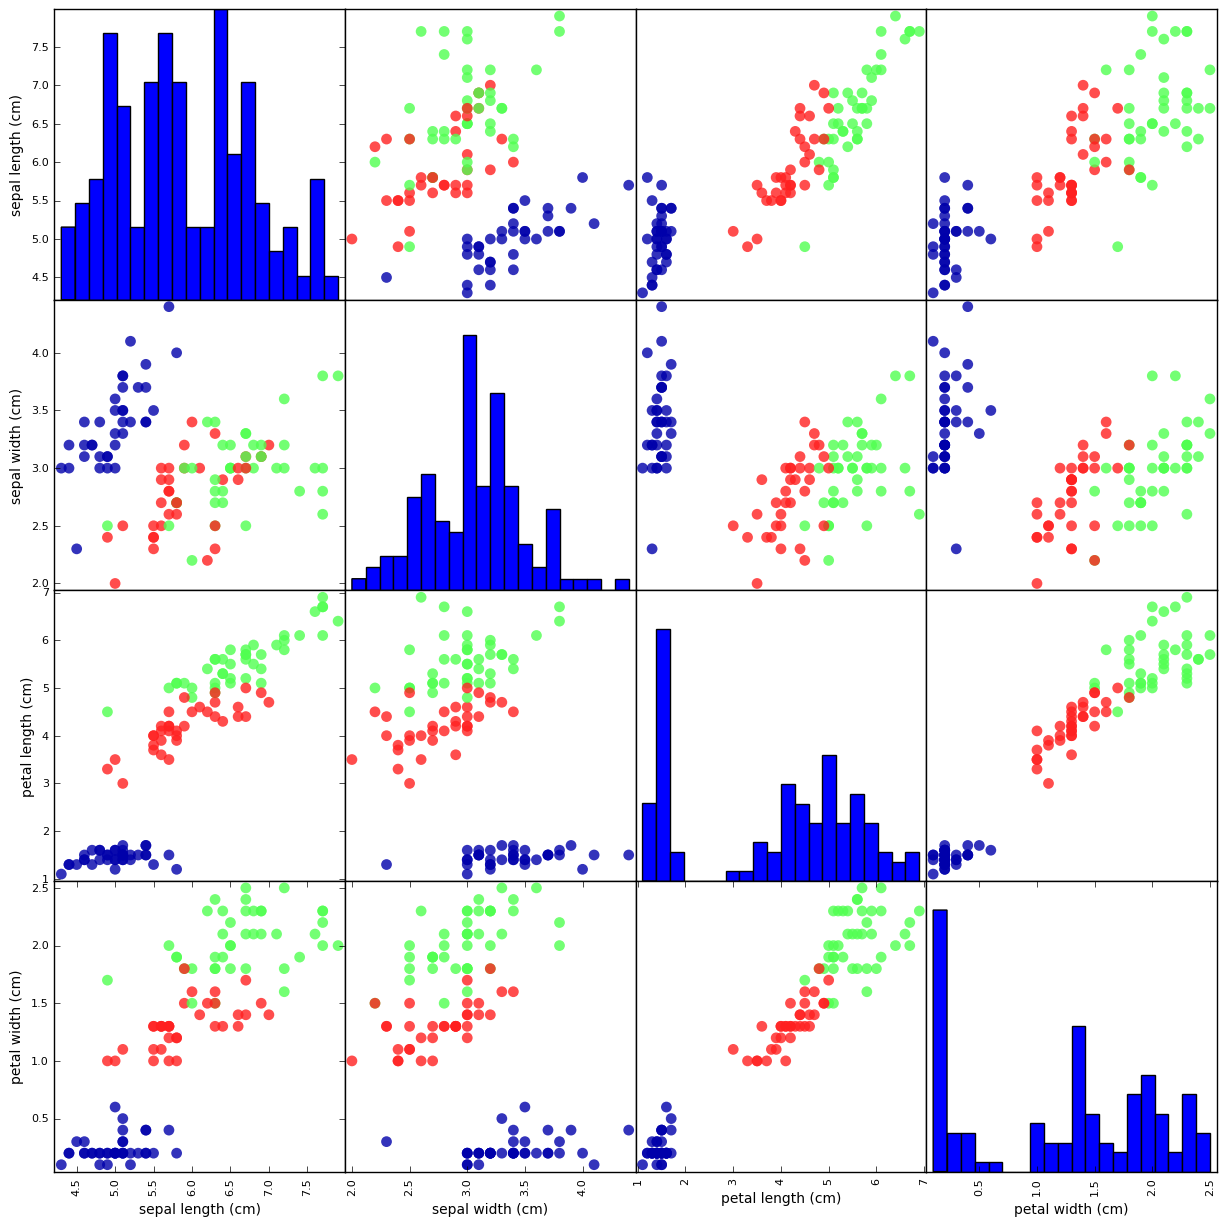

In [20]:
# 利用X_train中的数据创建DataFrame
# 利用iris_dataset.feature_names中的字符串对数据列进行标记
iris_dataframe=pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 利用DataFrame创建散点图矩阵，按y_train着色
grr=pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap=mglearn.cm3)

从图中可以看出，利用花瓣和花萼的测量数据基本可以将三个类别区分开。这说明机器学习模型很可能可以学会区分它们。

## 1.4 KNN算法

现在我们可以开始构建真实的机器学习模型了。 scikit-learn 中有许多可用的分类算法。这里我们用的是 k 近邻分类器，这是一个很容易理解的算法。构建此模型只需要保存训练集即可。要对一个新的数据点做出预测，算法会在训练集中寻找与这个新数据点距离最近的数据点，然后将找到的数据点的标签赋值给这个新数据点。

k 近邻算法中 k 的含义是，我们可以考虑训练集中与新数据点最近的任意 k 个邻居（比如说，距离最近的 3 个或 5 个邻居），而不是只考虑最近的那一个。然后，我们可以用这些邻居中数量最多的类别做出预测。第 2 章会进一步介绍这个算法的细节，现在我们只考虑一个邻居的情况。

scikit-learn 中所有的机器学习模型都在各自的类中实现，这些类被称为 Estimator类。k 近邻分类算法是在 neighbors 模块的 KNeighborsClassifier 类中实现的。我们需要将这个类实例化为一个对象，然后才能使用这个模型。这时我们需要设置模型的参数。KNeighborsClassifier 最重要的参数就是邻居的数目，这里我们设为 1 ：

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn 对象对算法进行了封装，既包括用训练数据构建模型的算法，也包括对新数据点进行预测的算法。它还包括算法从训练数据中提取的信息。对于 KNeighborsClassifier 来说，里面只保存了训练集。

想要基于训练集来构建模型，需要调用 knn 对象的 fit 方法，输入参数为 X_train 和 y_train ，二者都是 NumPy 数组，前者包含训练数据，后者包含相应的训练标签：

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

fit 方法返回的是 knn 对象本身并做原处修改，因此我们得到了分类器的字符串表示。从中可以看出构建模型时用到的参数。几乎所有参数都是默认值，但你也会注意到 n_neighbors=1 ，这是我们传入的参数。 scikit-learn 中的大多数模型都有很多参数，但多用于速度优化或非常特殊的用途。你无需关注这个字符串表示中的其他参数。打印 scikit-learn 模型会生成非常长的字符串，但不要被它吓到。我们会在第 2 章讲到所有重要的参数。在本书的其他章节中，我们不会给出 fit 的输出，因为里面没有包含任何新的信息。

## 1.5 预测和评估

这里需要用到之前创建的测试集。这些数据没有用于构建模型，但我们知道测试集中每朵鸢尾花的实际品种。

因此，我们可以对测试数据中的每朵鸢尾花进行预测，并将预测结果与标签（已知的品种）进行对比。我们可以通过计算精度（accuracy）来衡量模型的优劣，精度就是品种预测正确的花所占的比例：

In [23]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [24]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


我们还可以使用 knn 对象的 score 方法来计算测试集的精度：

In [25]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


对于这个模型来说，测试集的精度约为 0.97，也就是说，对于测试集中的鸢尾花，我们的预测有 97% 是正确的。根据一些数学假设，对于新的鸢尾花，可以认为我们的模型预测结果有 97% 都是正确的。对于我们的植物学爱好者应用程序来说，高精度意味着模型足够可信，可以使用。在后续章节中，我们将讨论提高性能的方法，以及模型调参时的注意事项。